In [1]:
%matplotlib inline 

from weibo.get_weibo import get_weibo
from weibo.baidu_nltk import get_sentiment_simple, get_sentiment_positive_proba, tokenize,tokenize_df

import pandas as pd
import numpy as np
import utilities.misc as um
import utilities.constants as uc
import utilities.display as ud

import time


from wordcloud import WordCloud
from scipy.misc import imread

import matplotlib.pyplot as plt

import feather

In [2]:
# load the data
path="D:\\data\\weibo\\"
weibo=feather.read_dataframe(path+'data.feather')
words=feather.read_dataframe(path+'words.feather')

In [3]:
english_name={'冠状病毒':'coronavirus','口罩':'mask','医生':'doctor','野味':'wild_animals','湖北':'hubei','武汉':'wuhan','疫情':'epidemic'}
weibo['topic_e']=weibo['topic'].map(lambda x: english_name[x])
words['topic_e']=words['topic'].map(lambda x: english_name[x])

Text(564.6704545454544, 0.5, '')

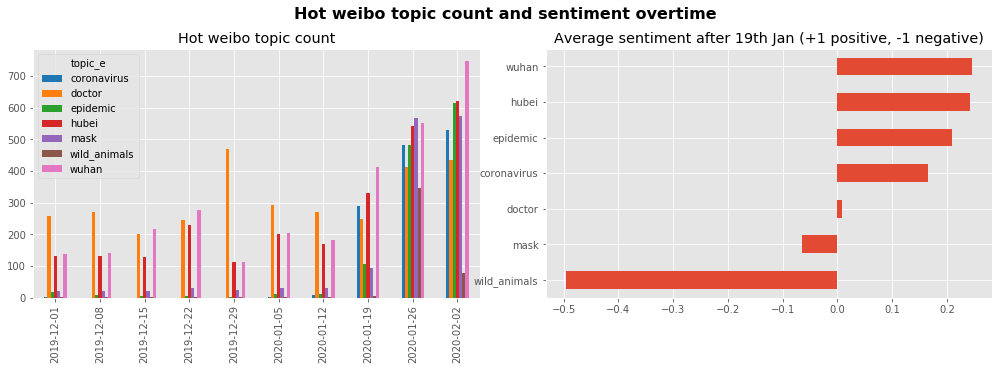

In [7]:
fig,axes=ud.easy_plot_quick_subplots((1,2),'Hot weibo topic count and sentiment overtime')

to_plot=weibo.groupby(['date','topic_e']).count()['owner'].unstack()
color=[uc.alt_colors_quick_pd_plot[i*2] for i in np.arange(0,len(to_plot),1)]
to_plot.index=to_plot.index.map(lambda x: x.strftime('%Y-%m-%d'))
to_plot.plot(ax=axes[0],color=color,kind='bar',title='Hot weibo topic count')

to_plot=weibo.groupby(['date','topic_e']).mean()['sentiment'].unstack().iloc[-3:].mean()-1
to_plot.sort_values().plot(ax=axes[1],kind='barh',title='Average sentiment after 19th Jan (+1 positive, -1 negative)')
axes[1].set_ylabel('')

In [74]:
# lock the word cloud obj
wc=WordCloud(
        background_color='black',
        #mask=backgroup_mask,   
        max_words=1000,
        font_path='D:\\data\\weibo\\stfangsong\\chinese.stfangso.ttf',
        max_font_size=100,
        colormap='hsv')

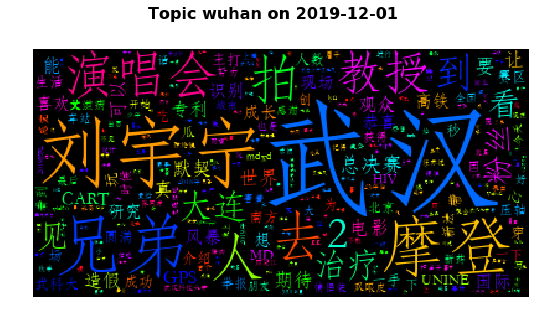

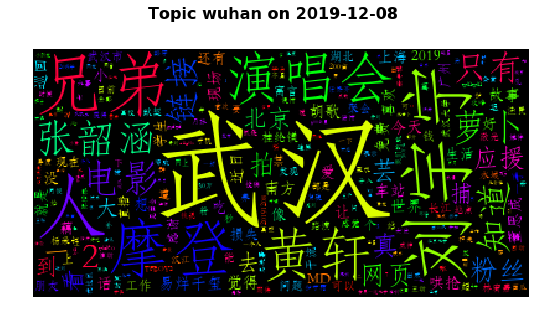

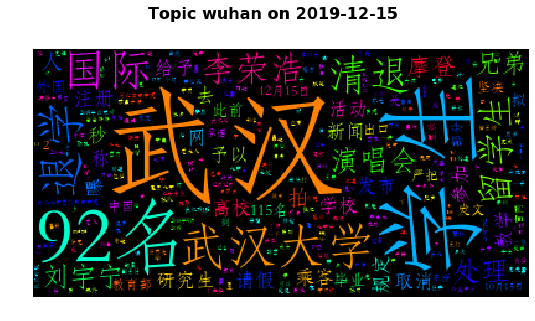

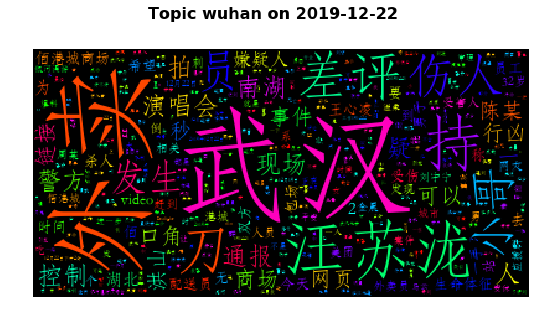

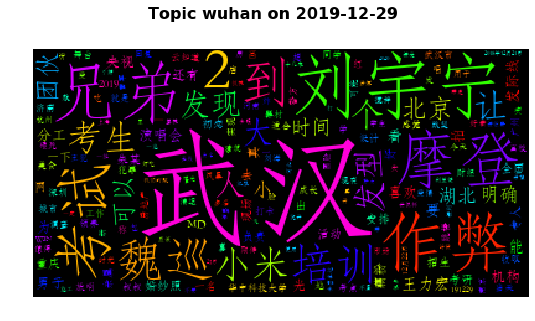

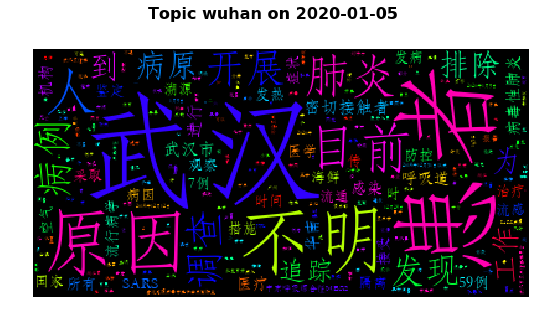

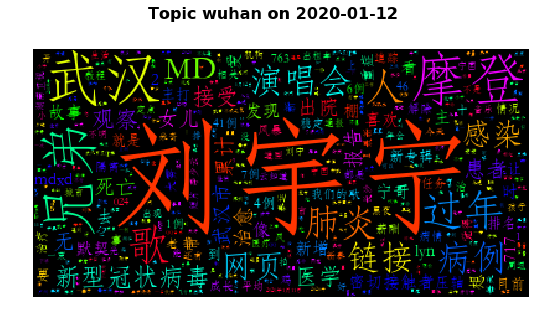

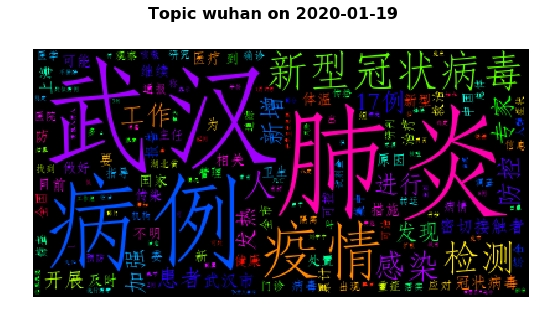

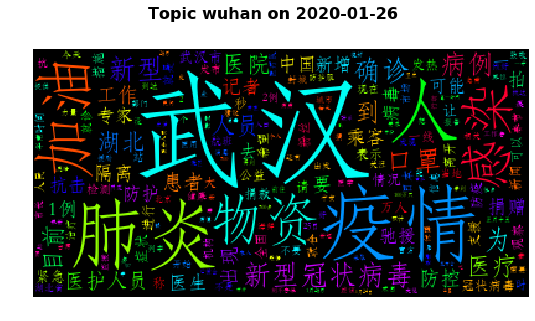

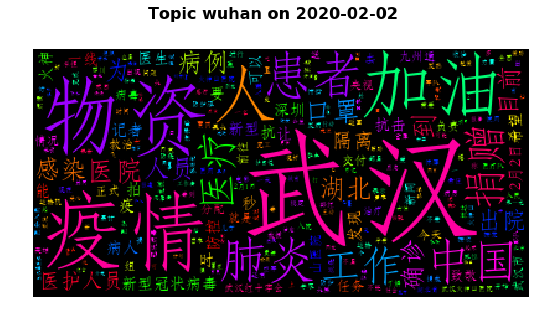

In [75]:
# chinese only, full data
topic_e='wuhan'
freq=words[words['topic_e']==topic_e].groupby(['date','item']).count()['topic_e']
all_dates=freq.index.levels[0]
for date in all_dates:
    word_cloud =wc.generate_from_frequencies(freq.loc[date].to_dict())
    fig,ax=ud.easy_plot_quick_subplots((1,1),'Topic %s on %s' % (topic_e,date.strftime('%Y-%m-%d')))
    ax.imshow(word_cloud)
    ax.axis("off")

# dump excel and manually copy to google for translation

In [15]:
# translation
top_pct=0.95
topic_e_all=list(english_name.values())

collector=[]
for topic in english_name.keys():
    
    print ('working on %s' % (topic))
    topic_e=english_name[topic]
    
    freq=words[words['topic_e']==topic_e].groupby(['date','item']).count()['topic_e'].rename('count')
    freq_short=freq.unstack().apply(lambda x: x.dropna().rank(pct=True),axis=1).applymap(lambda x: np.nan if x<top_pct else x).stack()
    freq=freq.loc[freq_short.index]

    freq=freq.reset_index().rename(columns={'level_1':'item'})

    freq['topic']=topic
    freq['topic_e']=topic_e
    
    collector.append(freq)
    
pd.concat(collector,axis=0).to_excel(path+'translation.xlsx' )

working on 冠状病毒
working on 口罩
working on 医生
working on 野味
working on 湖北
working on 武汉
working on 疫情


In [4]:
# load the translation (after the manual google translate)
translated=pd.read_excel(path+'translation.xlsx',sheet_name='Sheet1')

In [5]:
# lock the word cloud obj
wc_chinese=WordCloud(
        background_color='black',
        #mask=backgroup_mask,   
        max_words=1000,
        font_path='D:\\data\\weibo\\stfangsong\\chinese.stfangso.ttf',
        max_font_size=100,
        colormap='hsv')

wc_english=WordCloud(
        background_color='black',
        #mask=backgroup_mask,   
        max_words=1000,
        #font_path='D:\\data\\weibo\\stfangsong\\chinese.stfangso.ttf',
        max_font_size=100,
        colormap='hsv')

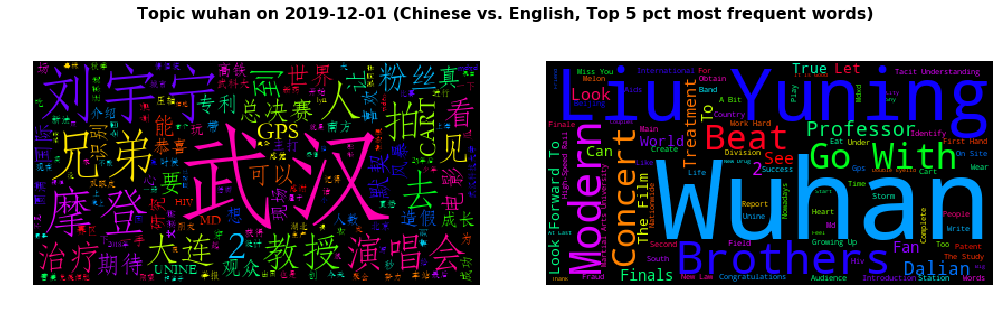

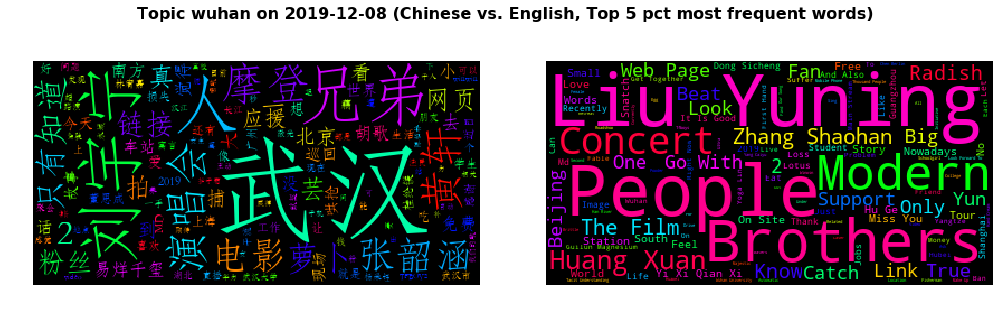

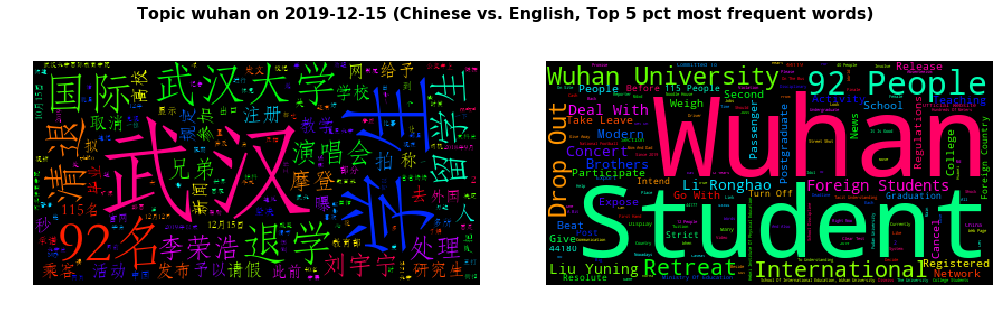

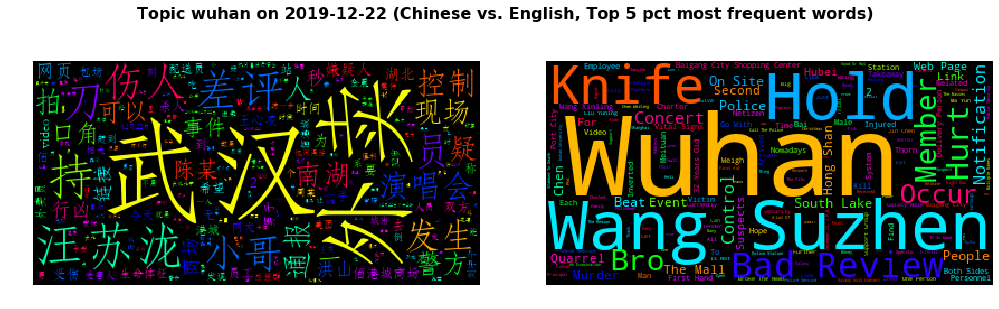

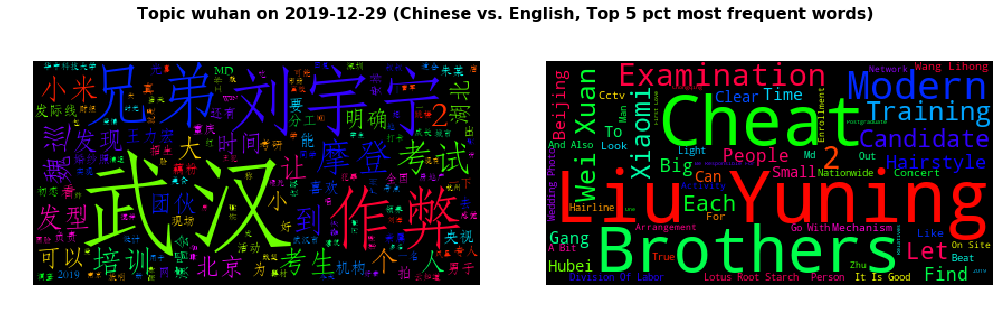

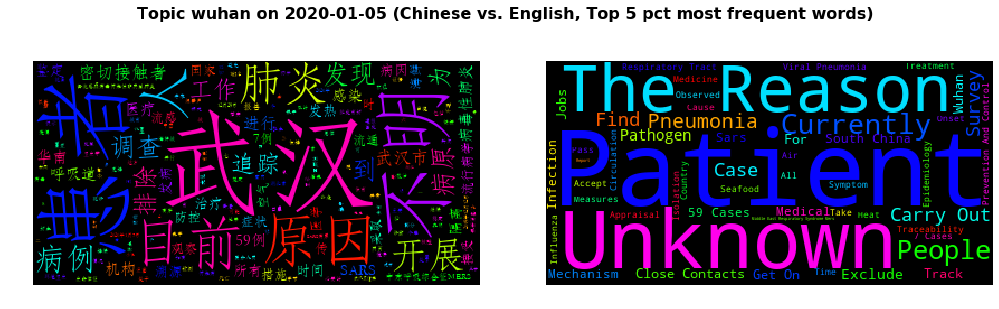

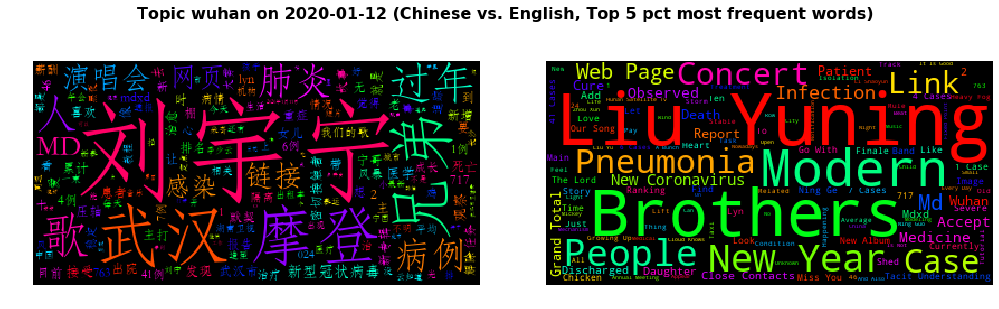

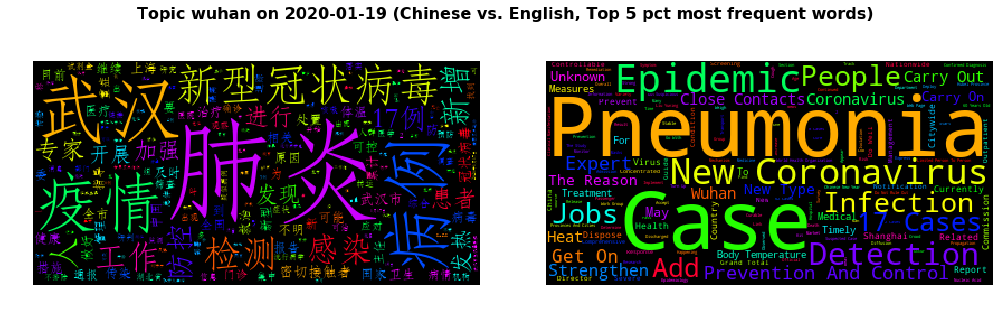

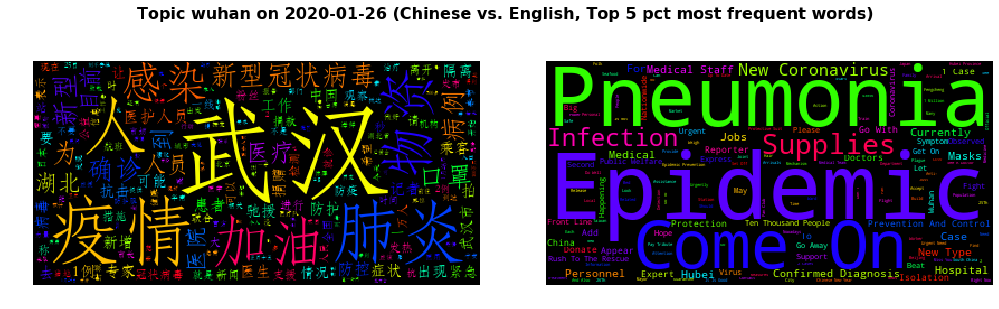

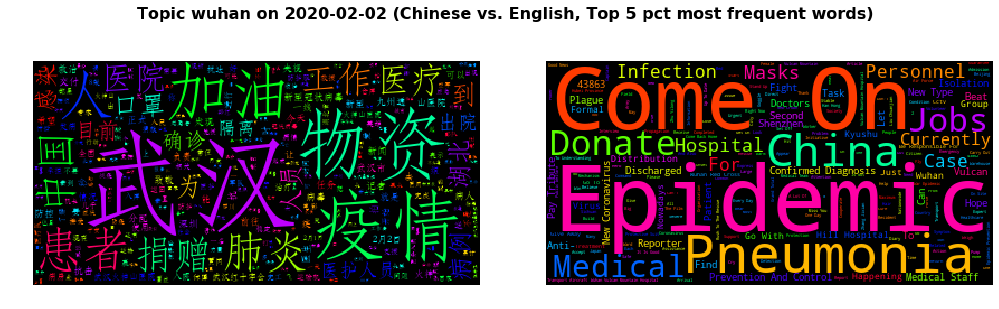

In [17]:
# chinese only, full data
topic_e='wuhan'

freq=translated.set_index(['topic_e','date']).loc[topic_e]
all_dates=freq.reset_index().groupby('date').last().index
for date in all_dates:
    
    fig,axes=ud.easy_plot_quick_subplots((1,2),'Topic %s on %s (Chinese vs. English, Top 5 pct most frequent words)' % (topic_e,date.strftime('%Y-%m-%d')))
    #chinese
    word_cloud =wc_chinese.generate_from_frequencies(freq.loc[date].set_index('item')['count'].to_dict())
    axes[0].imshow(word_cloud)
    axes[0].axis("off")
    
    #english
    word_cloud =wc_english.generate_from_frequencies(freq.loc[date].set_index('item_e')['count'].to_dict())
    axes[1].imshow(word_cloud)
    axes[1].axis("off")

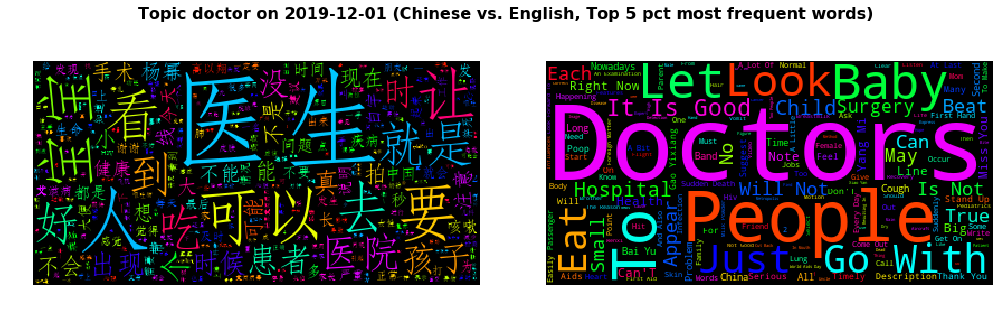

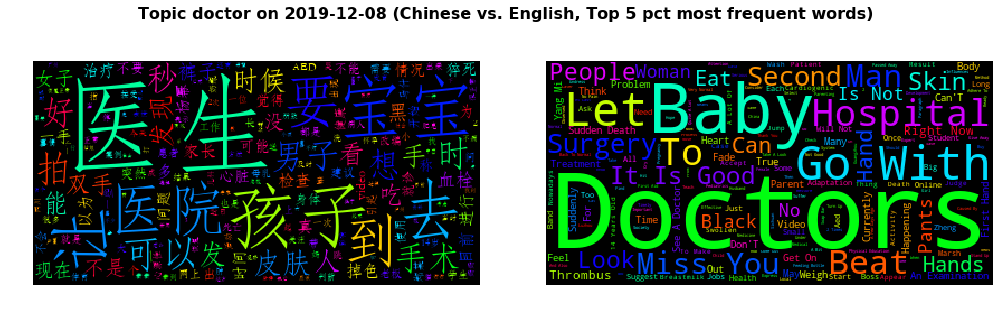

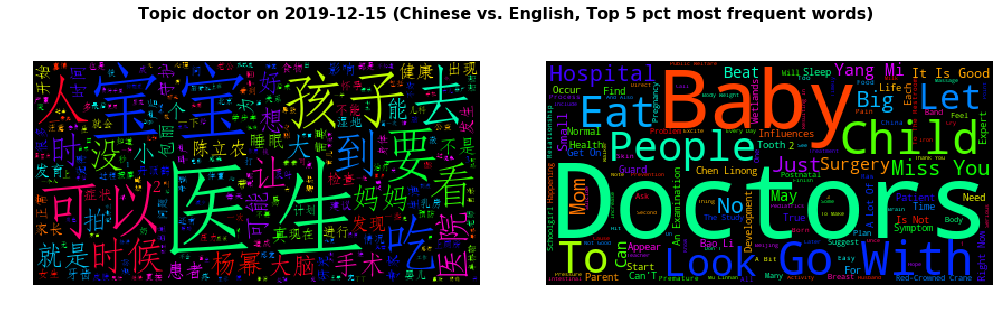

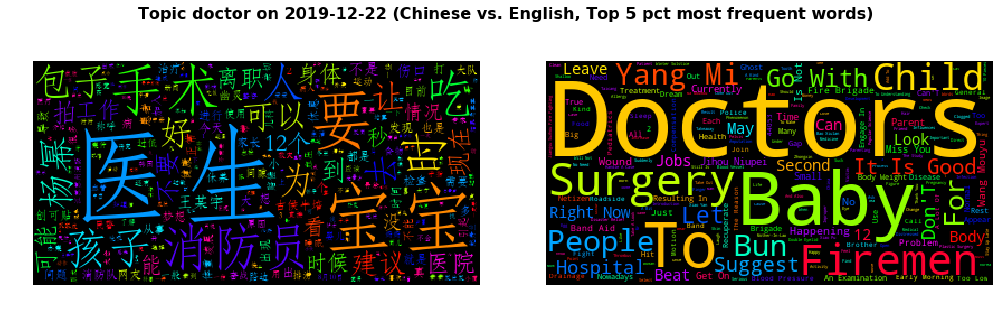

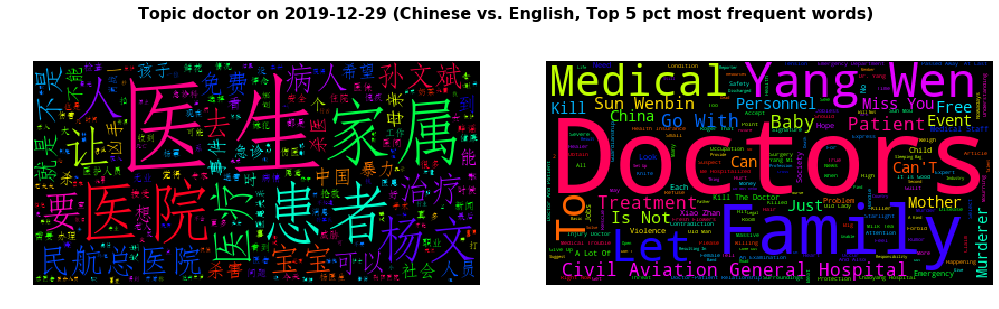

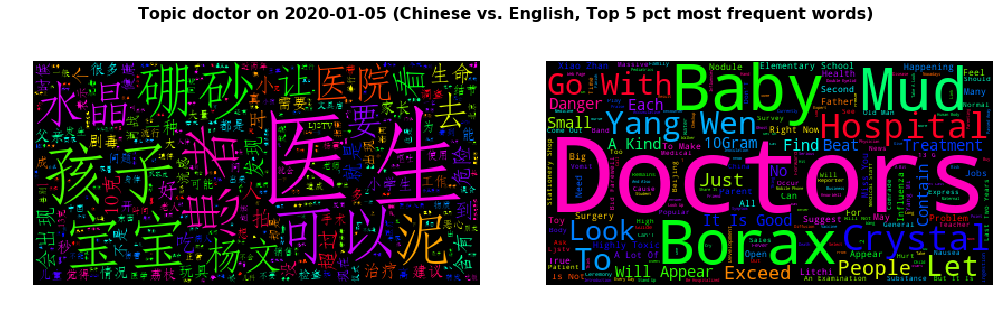

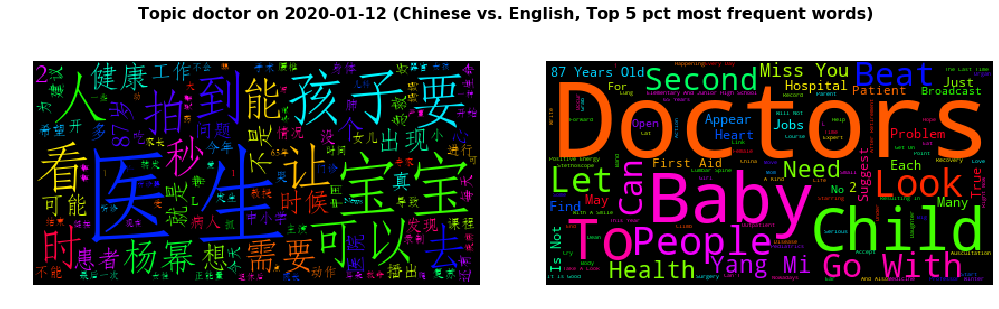

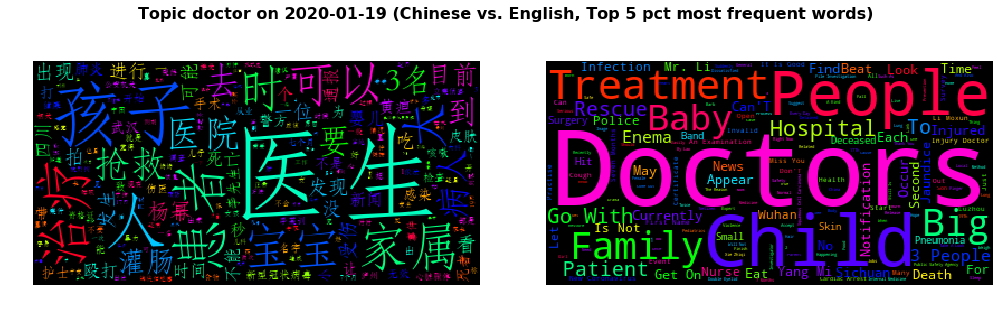

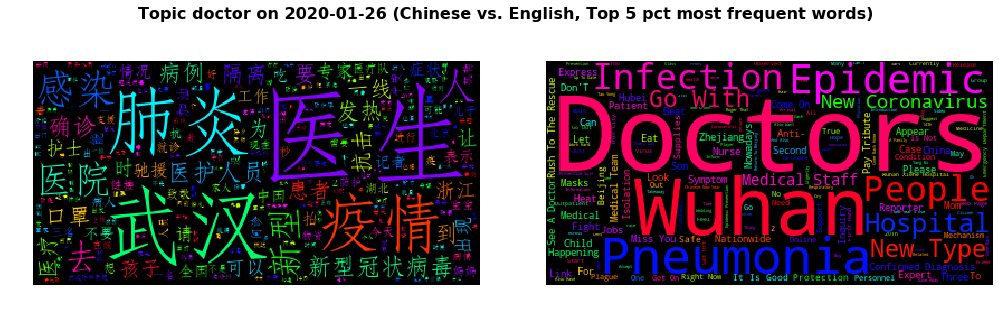

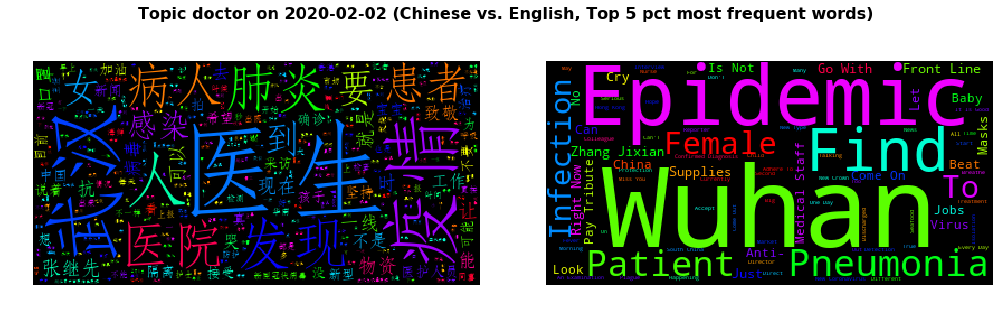

In [18]:
# chinese only, full data
topic_e='doctor'

freq=translated.set_index(['topic_e','date']).loc[topic_e]
all_dates=freq.reset_index().groupby('date').last().index
for date in all_dates:
    
    fig,axes=ud.easy_plot_quick_subplots((1,2),'Topic %s on %s (Chinese vs. English, Top 5 pct most frequent words)' % (topic_e,date.strftime('%Y-%m-%d')))
    #chinese
    word_cloud =wc_chinese.generate_from_frequencies(freq.loc[date].set_index('item')['count'].to_dict())
    axes[0].imshow(word_cloud)
    axes[0].axis("off")
    
    #english
    word_cloud =wc_english.generate_from_frequencies(freq.loc[date].set_index('item_e')['count'].to_dict())
    axes[1].imshow(word_cloud)
    axes[1].axis("off")

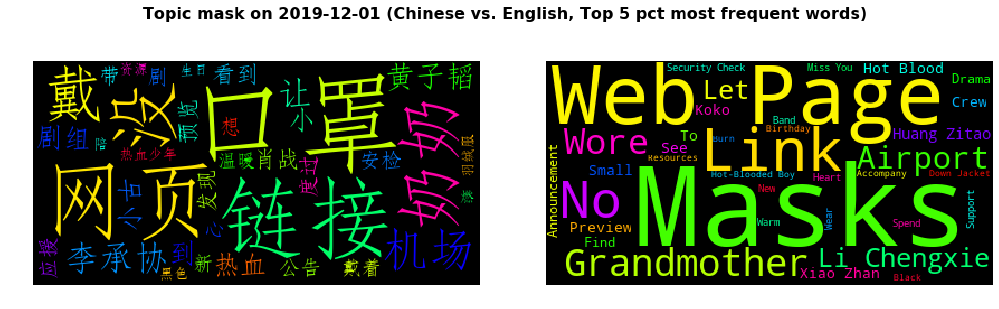

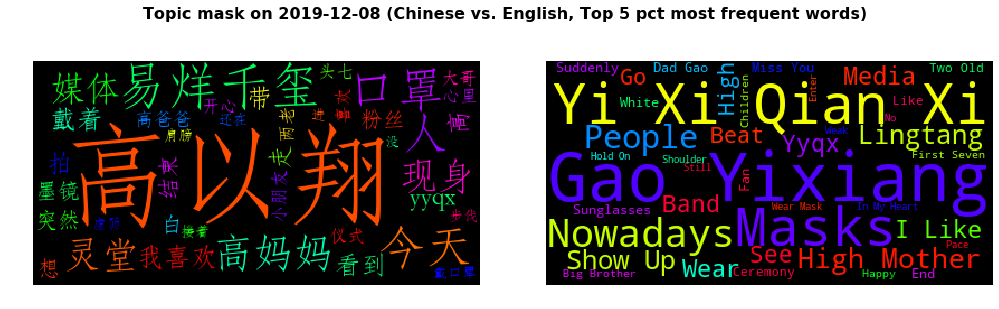

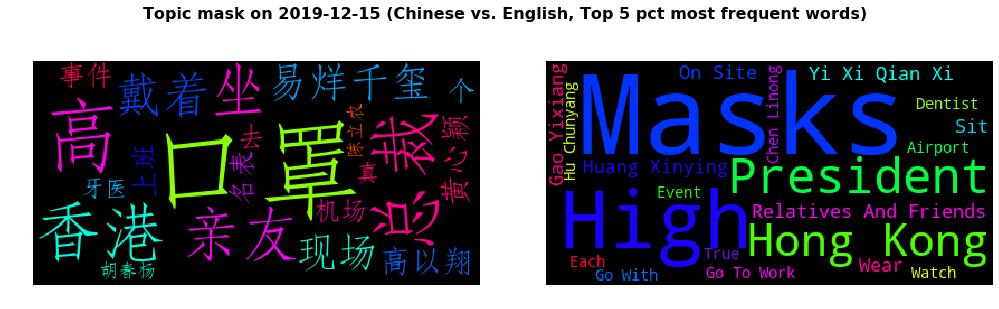

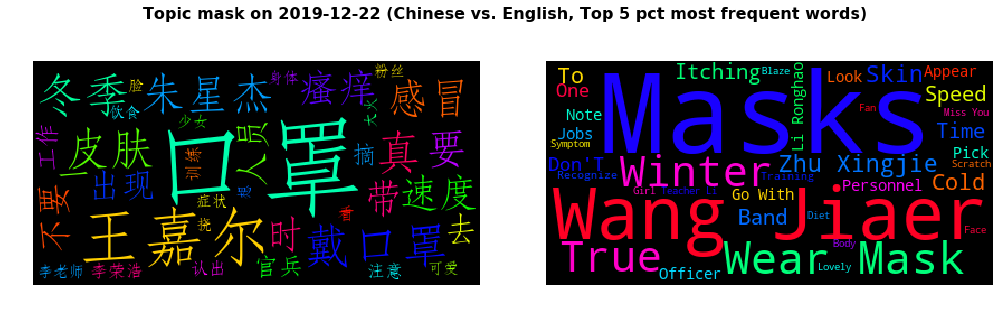

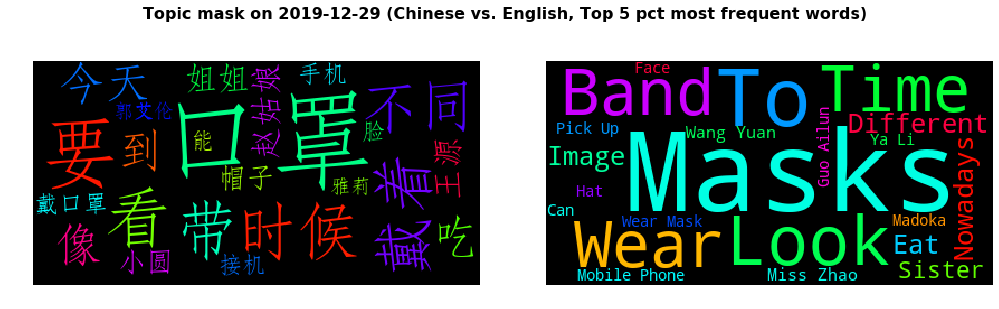

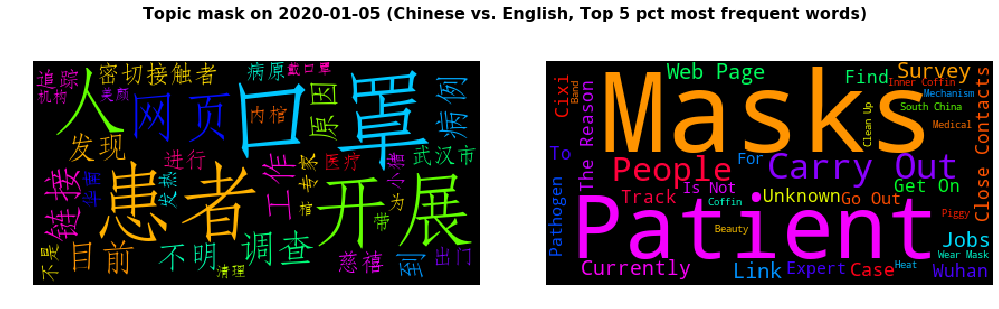

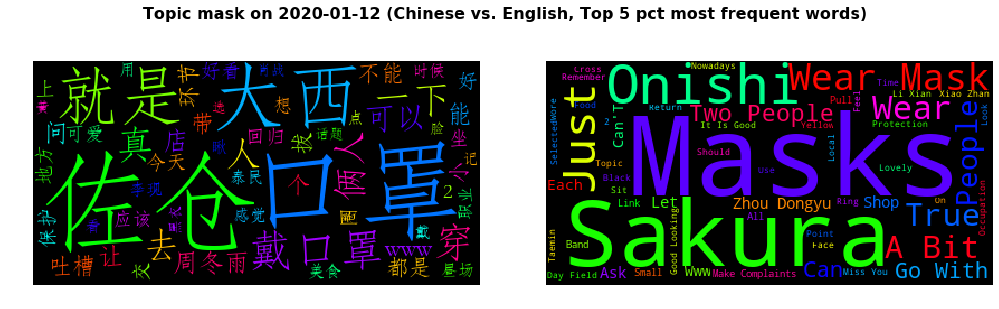

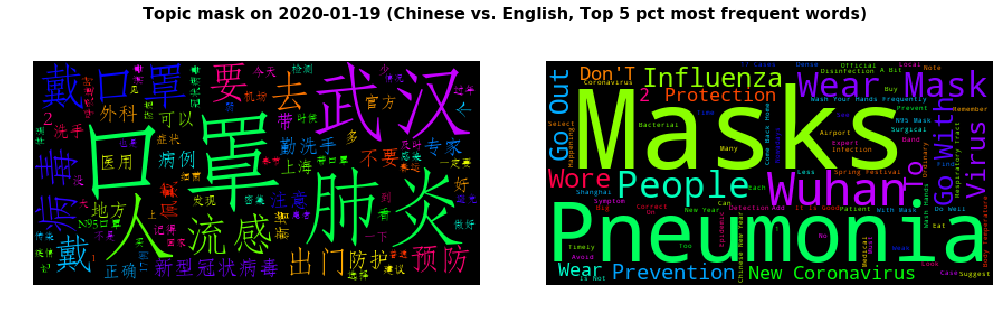

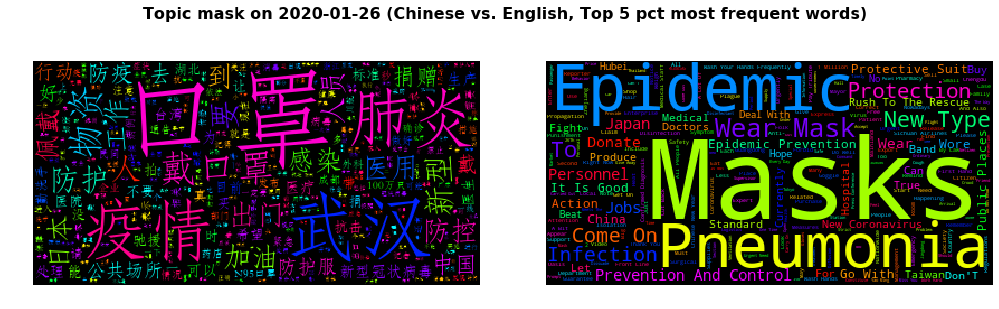

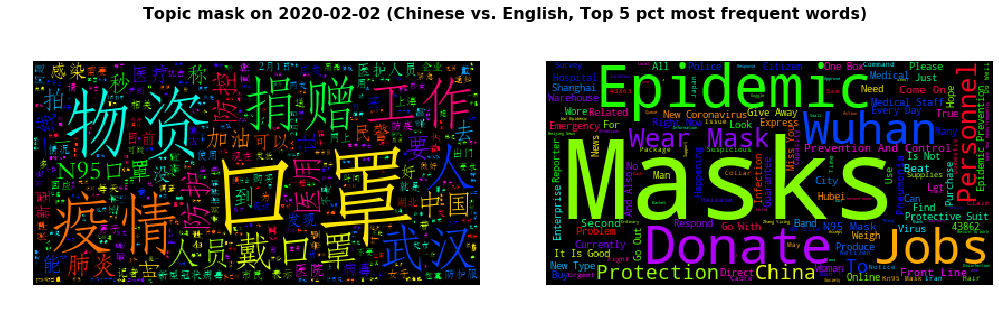

In [19]:
# chinese only, full data
topic_e='mask'

freq=translated.set_index(['topic_e','date']).loc[topic_e]
all_dates=freq.reset_index().groupby('date').last().index
for date in all_dates:
    
    fig,axes=ud.easy_plot_quick_subplots((1,2),'Topic %s on %s (Chinese vs. English, Top 5 pct most frequent words)' % (topic_e,date.strftime('%Y-%m-%d')))
    #chinese
    word_cloud =wc_chinese.generate_from_frequencies(freq.loc[date].set_index('item')['count'].to_dict())
    axes[0].imshow(word_cloud)
    axes[0].axis("off")
    
    #english
    word_cloud =wc_english.generate_from_frequencies(freq.loc[date].set_index('item_e')['count'].to_dict())
    axes[1].imshow(word_cloud)
    axes[1].axis("off")